In [1]:
from Bio import SeqIO
import pandas as pd
import subprocess
import os
from IPython.display import IFrame
from IPython.core.display import display
import RNA
from wand.image import Image as WImage

#### Will the AND-1 riboswitch cleave itself when both of its OBS are bound? Yes, presence of both with AND will cleave. 
#### Will the OR-1 riboswitch cleave itself when neither of its OBS are bound? No, lack of both with OR will not cleave. 
#### What behavior do we expect from the YES-1 riboswitch? Molecular switch activated with ligand bound OBS. 

### Sequences: Riboswitch
##### These sequences aren't listed and we had to manually copy the sequences down from the figures of each riboswitch
###### YES-1: GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC 
###### NOT-1: GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC  
###### AND-1: GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
###### OR-1: GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

In [2]:
# create table of coordinates for 4 riboswitches various components
data = {}
data2 = {}
data['name'] = ['YES-1', 'NOT-1', 'AND-1', 'OR-1']
data['start OBS-1'] = [26, 44, 30, 27]
data['end OBS-1'] = [47, 66, 45, 46]
data['start OBS-2'] = ['N/A', 'N/A', 49, 47]
data['end OBS-2'] = ['N/A', 'N/A', 64, 66]
data['start red-region-1'] = [16, 40, 16, 16]
data['end red-region-1'] = [21, 44, 23, 26]
data['start red-region-2'] = [49, 74, 70, 67]
data['end red-region-2'] = [54, 77, 77, 77]

data2['YES-1'] = [26, 47, 'n/a', 'n/a', 16, 21, 49, 54]
data2['NOT-1'] = [44, 66, 'n/a', 'n/a', 40, 44, 74, 77]
data2['AND-1'] = [30, 45, 49, 64, 16, 23, 70, 77]
data2['OR-1'] = [27, 46, 47, 66, 16, 26, 67, 77]

df = pd.DataFrame(data)
df


,name,start OBS-1,end OBS-1,start OBS-2,end OBS-2,start red-region-1,end red-region-1,start red-region-2,end red-region-2
0,YES-1,26,47,N/A,N/A,16,21,49,54
1,NOT-1,44,66,N/A,N/A,40,44,74,77
2,AND-1,30,45,49,64,16,23,70,77
3,OR-1,27,46,47,66,16,26,67,77


In [37]:
seqs = \
"""> YES_1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
> NOT_1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""
YES_1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
NOT_1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'
AND_1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
OR_1 = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
p = subprocess.run(['RNAfold'],
              input=bytes(seqs, 'ascii'),
              stdout=subprocess.PIPE,
              stderr=subprocess.PIPE)
print('This is what you would see in the terminal')
print(p.stderr.decode())
print('This is what you would see as output')
print(p.stdout.decode())

This is what you would see in the terminal

This is what you would see as output
> YES_1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
> NOT_1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



In [38]:
os.system("ps2pdf YES_1_ss.ps YES_1.pdf")
os.system("ps2pdf NOT_1_ss.ps NOT_1.pdf")
os.system("ps2pdf AND_1_ss.ps AND_1.pdf")
os.system("ps2pdf OR_1_ss.ps OR_1.pdf")

0

In [82]:
YESimage = WImage(filename = 'YES_1.pdf')
NOTimage = WImage(filename = 'NOT_1.pdf')
ANDimage = WImage(filename = 'AND_1.pdf')
ORimage = WImage(filename = 'OR_1.pdf')

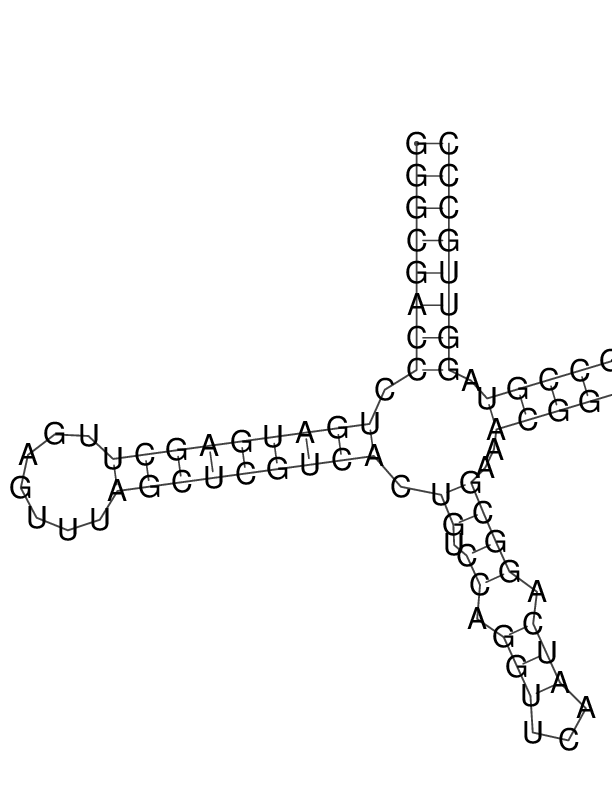

In [83]:
YESimage

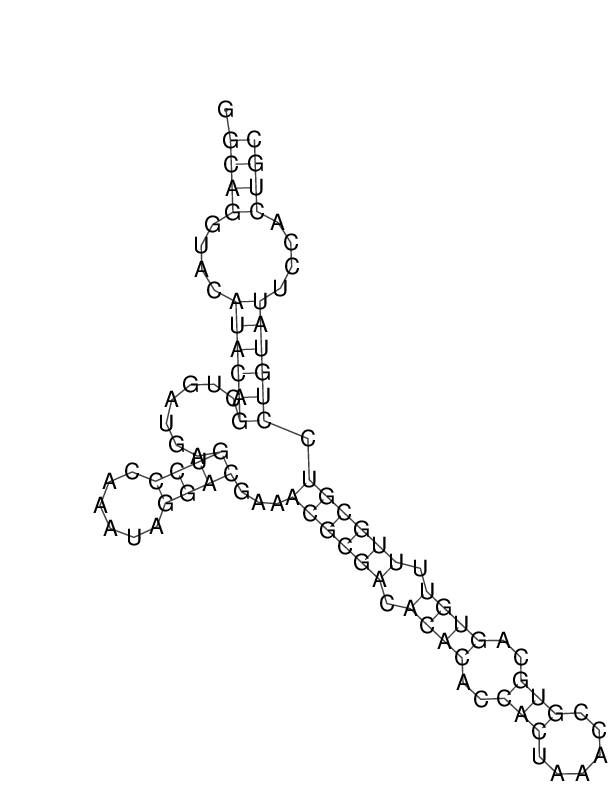

In [27]:
NOTimage

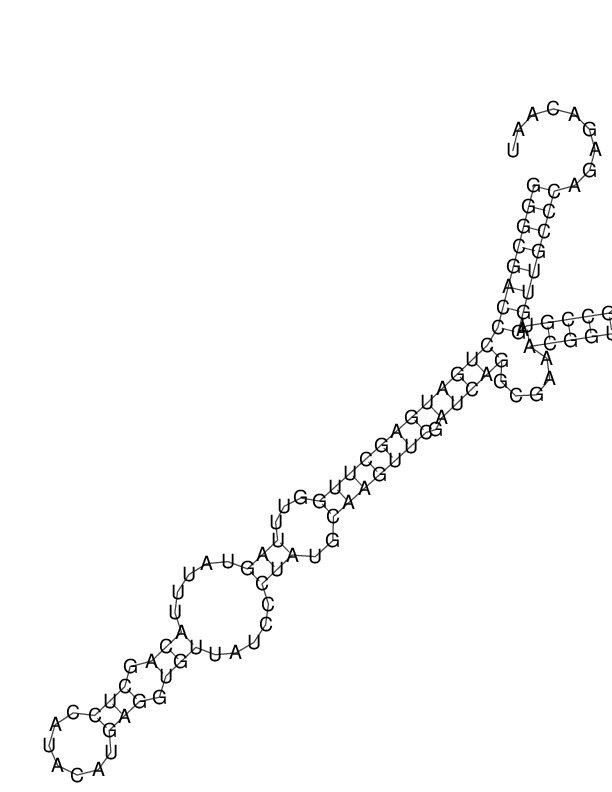

In [35]:
ANDimage

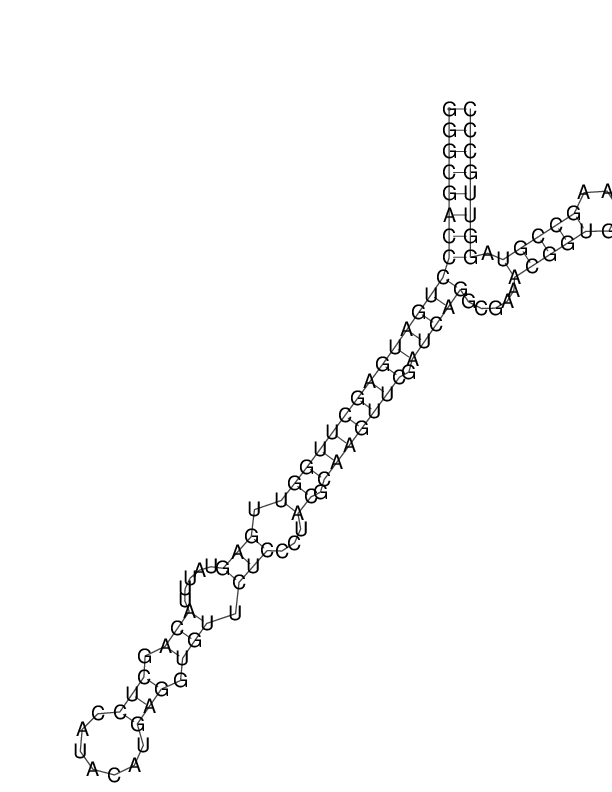

In [40]:
ORimage

#### These structures are not all the same as the riboswitches in the paper. The OR-1 looks almost identical, but for example, the angles between the 2 upper loops are not the same as in the paper. The YES-1 we developed has an extra stem loop altogether and one of its red regions bound in a loop. The NOT-1 red regions are bound together, which is what we expect in the unconstrained image. 

#### The paper specifies "standard assay conditions" under some of the figures and 23C under others. The paper states to "1.10: Run the program RNAheat (Vienna RNA folding package) for the ON and OFF states. If the dominant structures are not preserved in the range from 20 to 40 1C, reject sequence and go to 1.1." RNA Fold's default parameter is to only include loops under size 3 in their energy calculation, at 37C, which is slightly above the paper's temperatures. 

### Optimizing Structures by Blocking OBS Sites
##### note: i had difficulty creating txt files with the server using RNA fold so i manually created all the files in my Lab5 directory

In [55]:
# inputs a fasta file with constraints and returns the paranthetical structure and gibbs free energy
def subProcessProcedure(file):
    p = subprocess.run(['RNAfold', '-C', file],
              stdout=subprocess.PIPE,
              stderr=subprocess.PIPE)
    print('This is what you would see in the terminal')
    print(p.stderr.decode())
    print('This is what you would see as output')
    print(p.stdout.decode())

#### YES-1 Procedure

In [56]:
# creating a new string for YES 1 that blocks binding of OBS site 
optimized_YES_1 = ''
i = 0
while (i < len(YES_1)):
    if i in range(data2['YES-1'][0], data2['YES-1'][1] + 1):
        optimized_YES_1 = optimized_YES_1 + 'x'
    else:
        optimized_YES_1 = optimized_YES_1 + '.'
    i = i + 1
print(optimized_YES_1)

..........................xxxxxxxxxxxxxxxxxxxxxx................................


In [73]:
# writing constrained string to txt file
YES1_constrained = \
"""> YES_1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
..........................xxxxxxxxxxxxxxxxxxxxxx................................"""
file_YES1 = open("YES-1_constraints.txt","a")
file_YES1.seek(0)
file_YES1.truncate()
file_YES1.write(YES1_constrained)
file_YES1.close()

This is what you would see in the terminal

This is what you would see as output
> YES_1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)



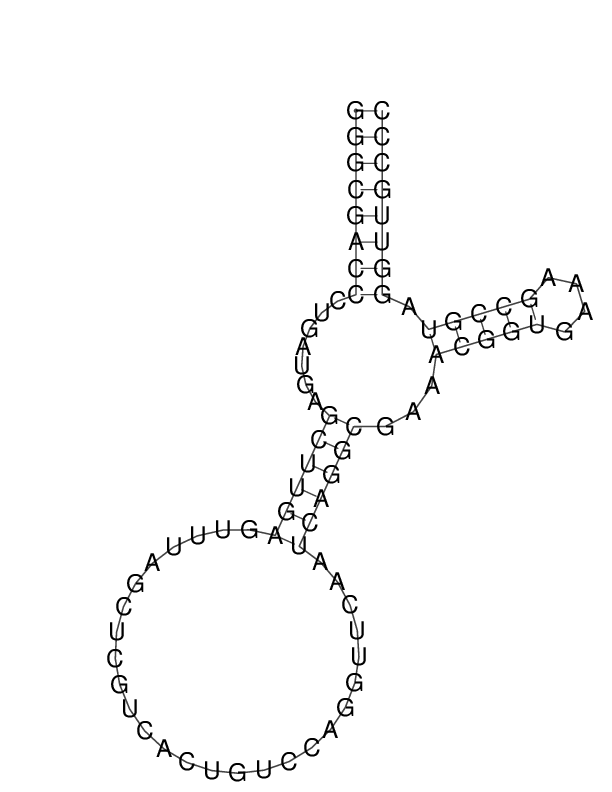

In [74]:
subProcessProcedure('YES-1_constraints.txt')
os.system("ps2pdf YES_1_ss.ps YES_1_constraints.pdf")
YES1_constraints_image = WImage(filename = 'YES_1_constraints.pdf')
YES1_constraints_image

#### NOT-1 Procedure

In [59]:
# creating a new string for NOT 1 that blocks binding of OBS site 
optimized_NOT_1 = ''
i = 0
while (i < len(NOT_1)):
    if i in range(data2['NOT-1'][0], data2['NOT-1'][1] + 1):
        optimized_NOT_1 = optimized_NOT_1 + 'x'
    else:
        optimized_NOT_1 = optimized_NOT_1 + '.'
    i = i + 1
print(optimized_NOT_1)

............................................xxxxxxxxxxxxxxxxxxxxxxx.........................


In [75]:
# writing constrained string to txt file
NOT1_constrained = \
"""> NOT_1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
............................................xxxxxxxxxxxxxxxxxxxxxxx........................."""
file_NOT1 = open("NOT-1_constraints.txt","a")
file_NOT1.seek(0)
file_NOT1.truncate()
file_NOT1.write(NOT1_constrained)
file_NOT1.close()

This is what you would see in the terminal

This is what you would see as output
> NOT_1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((...........................))))).))))))))))....)))) (-16.00)



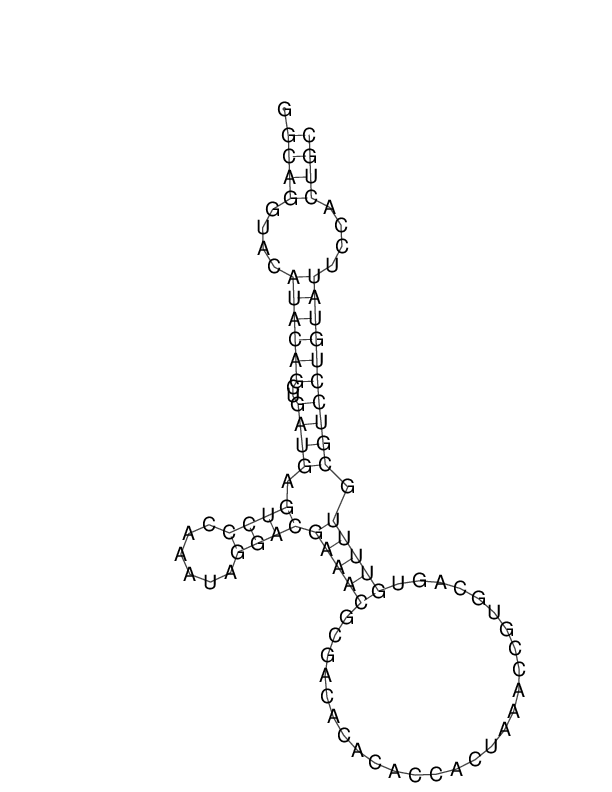

In [76]:
subProcessProcedure('NOT-1_constraints.txt')
os.system("ps2pdf NOT_1_ss.ps NOT_1_constraints.pdf")
NOT1_constraints_image = WImage(filename = 'NOT_1_constraints.pdf')
NOT1_constraints_image

#### In the YES-1 constrained folded image, the red regions are bound to each other. In the NOT-1 constrained image, the red regions are not bound, and my OBS loop region is slightly larger than the image in the paper (3 more nucleotides). They both mostly resemble the self cleaving images of the paper, except for the specific orientations/angles the stem loops come out of the main stem. This has to do with the above images being a couple of bases off from the paper. 

#### AND-1 Procedure

In [62]:
# creating new strings for AND 1 that blocks binding of OBS site 
optimized_AND_1_TF = ''
optimized_AND_1_FT = ''
optimized_AND_1_FF = ''
i = 0
while (i < len(AND_1)):
    if i in range(data2['AND-1'][0], data2['AND-1'][1] + 1):
        optimized_AND_1_TF = optimized_AND_1_TF + 'x'
    else:
        optimized_AND_1_TF = optimized_AND_1_TF + '.'
    i = i + 1
j = 0
while (j < len(AND_1)):
    if j in range(data2['AND-1'][2], data2['AND-1'][3] + 1):
        optimized_AND_1_FT = optimized_AND_1_FT + 'x'
    else:
        optimized_AND_1_FT = optimized_AND_1_FT + '.'
    j = j + 1

k = 0
while (k < len(AND_1)):
    if (k in range(data2['AND-1'][0], data2['AND-1'][1] + 1) or k in range(data2['AND-1'][2], data2['AND-1'][3] + 1)):
        optimized_AND_1_FF = optimized_AND_1_FF + 'x'
    else:
        optimized_AND_1_FF = optimized_AND_1_FF + '.'
    k = k + 1
print(optimized_AND_1_TF)
print()
print(optimized_AND_1_FT)
print()
print(optimized_AND_1_FF)

..............................xxxxxxxxxxxxxxxx..................................................................

.................................................xxxxxxxxxxxxxxxx...............................................

..............................xxxxxxxxxxxxxxxx...xxxxxxxxxxxxxxxx...............................................


In [63]:
# writing constrained strings to txt files
AND_1_TF_constrained = \
"""> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
..............................xxxxxxxxxxxxxxxx.................................................................."""
AND_1_FT_constrained = \
"""> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.................................................xxxxxxxxxxxxxxxx..............................................."""
AND_1_FF_constrained = \
"""> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
..............................xxxxxxxxxxxxxxxx...xxxxxxxxxxxxxxxx..............................................."""
file_AND1_TF = open("AND-1_TF_constraints.txt","a")
file_AND1_TF.seek(0)
file_AND1_TF.truncate()
file_AND1_TF.write(AND_1_TF_constrained)
file_AND1_TF.close()

file_AND1_FT = open("AND-1_FT_constraints.txt","a")
file_AND1_FT.seek(0)
file_AND1_FT.truncate()
file_AND1_FT.write(AND_1_FT_constrained)
file_AND1_FT.close()


file_AND1_FF = open("AND-1_FF_constraints.txt","a")
file_AND1_FF.seek(0)
file_AND1_FF.truncate()
file_AND1_FF.write(AND_1_FF_constrained)
file_AND1_FF.close()

This is what you would see in the terminal

This is what you would see as output
> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)



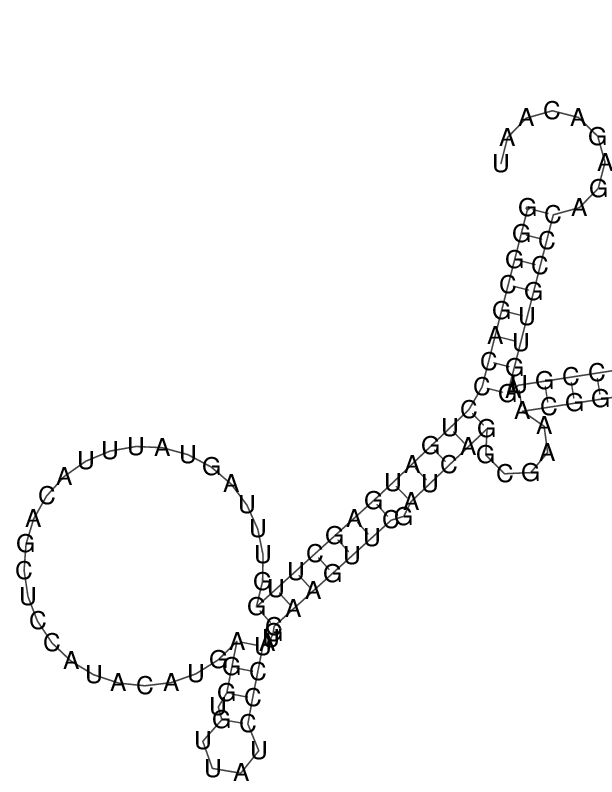

In [64]:
subProcessProcedure('AND-1_TF_constraints.txt')
os.system("ps2pdf AND_1_ss.ps AND-1_TF_constraints.pdf")
AND1_TF_constraints_image = WImage(filename = 'AND-1_TF_constraints.pdf')
AND1_TF_constraints_image

This is what you would see in the terminal

This is what you would see as output
> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))(.......) (-37.70)



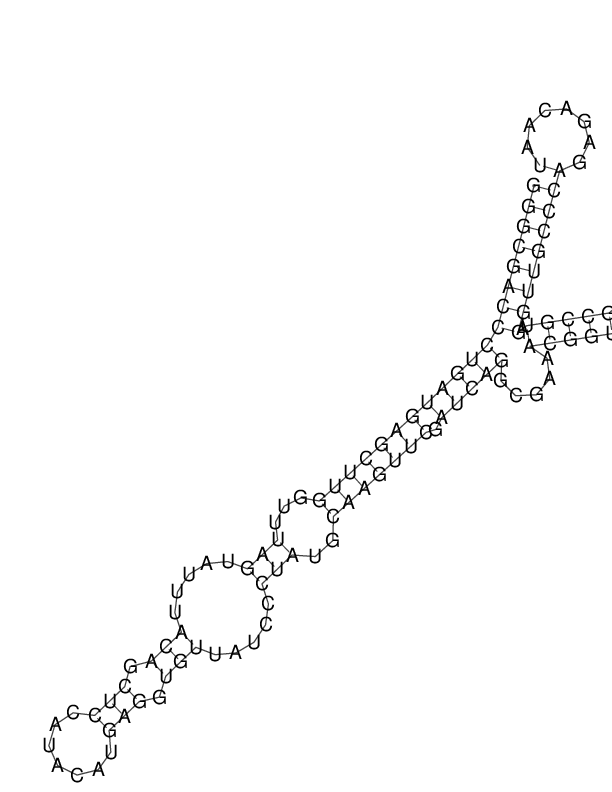

In [54]:
subProcessProcedure('AND-1_FT_constraints.txt')
os.system("ps2pdf AND_1_ss.ps AND-1_FT_constraints.pdf")
AND1_FT_constraints_image = WImage(filename = 'AND-1_FT_constraints.pdf')
AND1_FT_constraints_image

This is what you would see in the terminal

This is what you would see as output
> AND_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((................................................)))).))))).....(((((....))))).))))))))......... (-26.30)



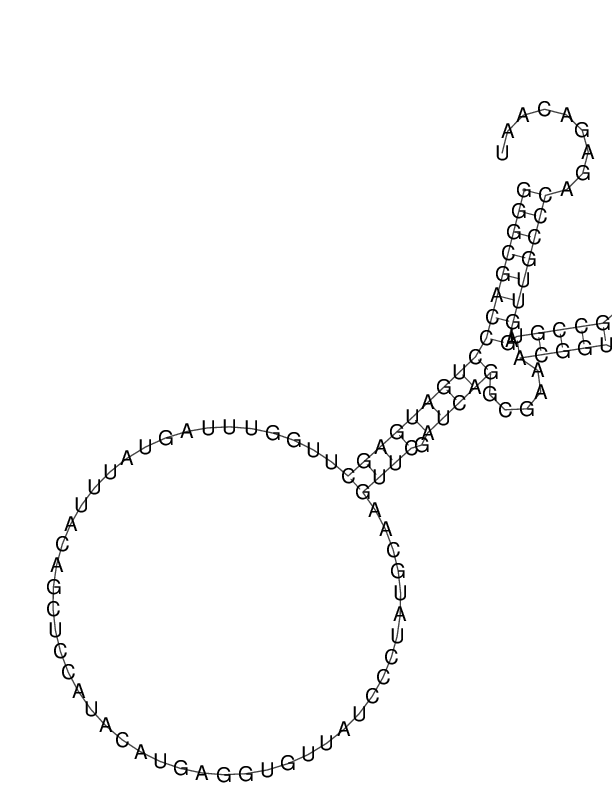

In [65]:
subProcessProcedure('AND-1_FF_constraints.txt')
os.system("ps2pdf AND_1_ss.ps AND-1_FF_constraints.pdf")
AND1_FF_constraints_image = WImage(filename = 'AND-1_FF_constraints.pdf')
AND1_FF_constraints_image

#### OR-1 Procedure

In [18]:
# creating new strings for OR 1 that blocks binding of OBS site 
optimized_OR_1_TF = ''
optimized_OR_1_FT = ''
optimized_OR_1_FF = ''
i = 0
while (i < len(OR_1)):
    if i in range(data2['OR-1'][0], data2['OR-1'][1] + 1):
        optimized_OR_1_TF = optimized_OR_1_TF + 'x'
    else:
        optimized_OR_1_TF = optimized_OR_1_TF + '.'
    i = i + 1
j = 0
while (j < len(OR_1)):
    if j in range(data2['OR-1'][2], data2['OR-1'][3] + 1):
        optimized_OR_1_FT = optimized_OR_1_FT + 'x'
    else:
        optimized_OR_1_FT = optimized_OR_1_FT + '.'
    j = j + 1

k = 0
while (k < len(OR_1)):
    if (k in range(data2['OR-1'][0], data2['OR-1'][1] + 1) or k in range(data2['OR-1'][2], data2['OR-1'][3] + 1)):
        optimized_OR_1_FF = optimized_OR_1_FF + 'x'
    else:
        optimized_OR_1_FF = optimized_OR_1_FF + '.'
    k = k + 1
print(optimized_OR_1_TF)
print()
print(optimized_OR_1_FT)
print()
print(optimized_OR_1_FF)

...........................xxxxxxxxxxxxxxxxxxxx........................................................

...............................................xxxxxxxxxxxxxxxxxxxx....................................

...........................xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx....................................


In [69]:
# writing constrained strings to txt files
OR_1_TF_constrained = \
"""> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
...........................xxxxxxxxxxxxxxxxxxxx........................................................"""
OR_1_FT_constrained = \
"""> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
...............................................xxxxxxxxxxxxxxxxxxxx...................................."""
OR_1_FF_constrained = \
"""> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
...........................xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...................................."""
file_OR1_TF = open("OR-1_TF_constraints.txt","a")
file_OR1_TF.seek(0)
file_OR1_TF.truncate()
file_OR1_TF.write(OR_1_TF_constrained)
file_OR1_TF.close()

file_OR1_FT = open("OR-1_FT_constraints.txt","a")
file_OR1_FT.seek(0)
file_OR1_FT.truncate()
file_OR1_FT.write(OR_1_FT_constrained)
file_OR1_FT.close()


file_OR1_FF = open("OR-1_FF_constraints.txt","a")
file_OR1_FF.seek(0)
file_OR1_FF.truncate()
file_OR1_FF.write(OR_1_FF_constrained)
file_OR1_FF.close()

This is what you would see in the terminal

This is what you would see as output
> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)



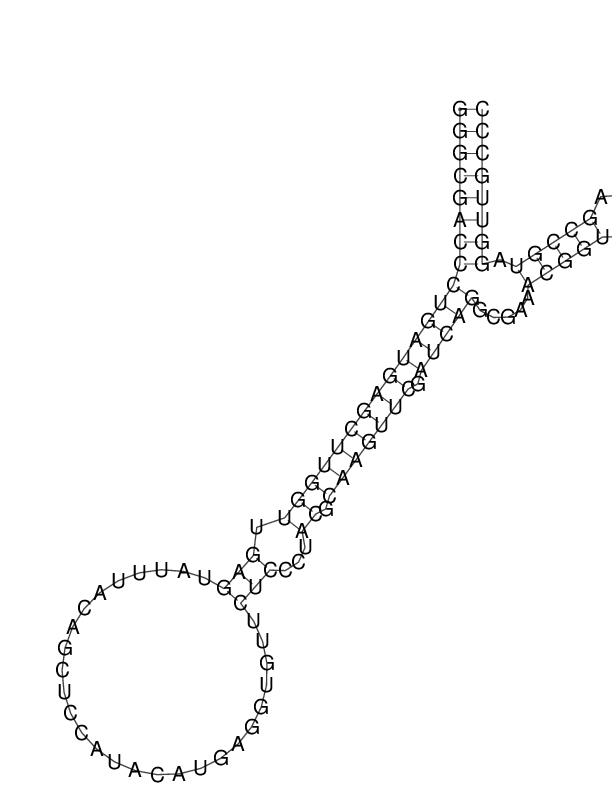

In [70]:
subProcessProcedure('OR-1_TF_constraints.txt')
os.system("ps2pdf OR_1_ss.ps OR-1_TF_constraints.pdf")
OR1_TF_constraints_image = WImage(filename = 'OR-1_TF_constraints.pdf')
OR1_TF_constraints_image

This is what you would see in the terminal

This is what you would see as output
> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((((((..........................................))))))))))...(((((....))))).)))))))) (-28.84)



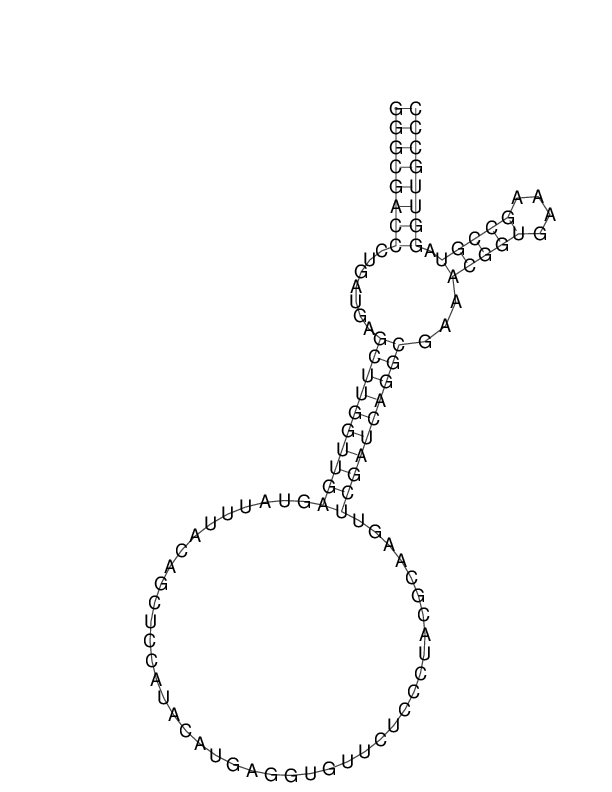

In [71]:
subProcessProcedure('OR-1_FT_constraints.txt')
os.system("ps2pdf OR_1_ss.ps OR-1_FT_constraints.pdf")
OR1_FT_constraints_image = WImage(filename = 'OR-1_FT_constraints.pdf')
OR1_FT_constraints_image

This is what you would see in the terminal

This is what you would see as output
> OR_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((((((..........................................))))))))))...(((((....))))).)))))))) (-28.84)



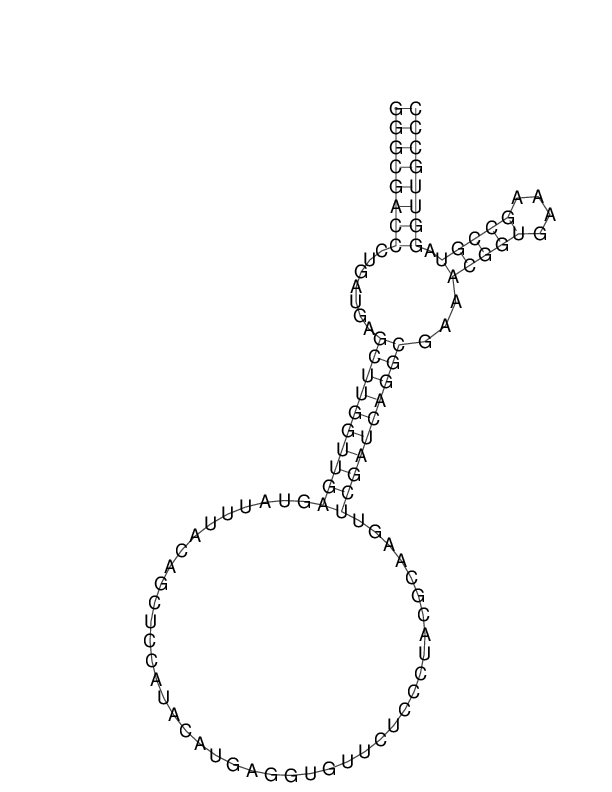

In [72]:
subProcessProcedure('OR-1_FF_constraints.txt')
os.system("ps2pdf OR_1_ss.ps OR-1_FF_constraints.pdf")
OR1_FF_constraints_image = WImage(filename = 'OR-1_FF_constraints.pdf')
OR1_FF_constraints_image

### Logic Gate Truth Tables

In [80]:
f, t = 'FALSE', 'TRUE'
OR_truth_table = pd.DataFrame(data={'Input_1': [f,f,t,t],
                                   'Input_2': [f,t,f,t],
                                    'Output': [f,t,t,t]})
print('OR Truth Table:')
OR_truth_table

OR Truth Table:


,Input_1,Input_2,Output
0,FALSE,FALSE,FALSE
1,FALSE,TRUE,TRUE
2,TRUE,FALSE,TRUE
3,TRUE,TRUE,TRUE


In [81]:
AND_truth_table = pd.DataFrame(data={'Input_1': [f,f,t,t],
                                   'Input_2': [f,t,f,t],
                                    'Output': [f,f,f,t]})
print('AND Truth Table:')
AND_truth_table

AND Truth Table:


,Input_1,Input_2,Output
0,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE
2,TRUE,FALSE,FALSE
3,TRUE,TRUE,TRUE


#### According to theses images, the riboswitches in the paper do mostly fold as indicated. Some of the differences between our images and the paper's have to do with temperature and specific conditions inside the RNA Fold-er. However, general structure is almost identical amongst the AND and OR switches. The OR-1 F/T is the most dissimilar from the paper because ours includes a long stem with a small loop before the OBS site which does not exist in the paper. 